> 
# Project: Investigating a data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset comes from IMDB and contains information about 10k movies,short films and tv series collected from The Movie Database TMDb, including users'ratings, revenue, runtime and budget.The user always had a huge interest in watching movies and TV shows . The user also experienced good and bad movies , but what determines wether a movie is considered as good or bad? There could be several factors influencig the quality of a movie, for instance the budget, genre, etc. This project should help the user to explore some of the good criteria for movies and TV shows.

<a id = 'Q'></a>
## Questions to answer :
 >Questions to answer
 ><ul>
    <li>Which year had the best movies and TVshows?</li>
    <li>Did movies with higher vote count received a better rating?</li>
    <li>What is the relationship between the vote avg and runtime?</li>
    <li>How did the amount of produced films changed over time?</li>
   </ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.info(),
print('The dataframe contains {} columns and {} rows'.format(df.shape[1],df.shape[0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning (Replace this with more specific notes!)
>>Handling with 0 and NaN
df.info( ) showed that most columns with important content for the analysis, such us revenue, release_year, ..etc having a huge amount of available data for the data analysis.The .describe() method and the histograms indicate that many columns such as budget and revenue, contain many zeroes in their columns and for providing a proper analysis the columns "budget_adj" "revenue_adj", "budget", "revenue" and "runtime" will change its zeroes values into nans and the respective colums will be deleted for the analysis.
>Here we will replace the zeroes with nan values . The rows with several values will be seperated in columns containing only one value ,this is needed to perform a proper analysis ,then we will delete the not important rows  before performing data cleaning such as deleting duplicated lines, correct data types and checking duplicated entries in some selected columns.

In [8]:
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [17]:
dfc = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
dfd = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
dfk = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
dfg = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
dfp = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))


KeyError: 'cast'

In [18]:
df = df.join([df_c, df_d, df_k, df_g, df_p])
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

NameError: name 'df_c' is not defined

In [12]:
df.duplicated().sum()

0

In [14]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [19]:
print('Dataframe contains {} columns and {} rows'.format(df.shape[1],df.shape[0]))


Dataframe contains 11 columns and 1287 rows


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 :Which year had the best movies and TVshows?

In [63]:
df.head(3)

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2480,6.3,2015,1.012000e+08,2.716190e+08


In [65]:
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1974, 1975, 1962, 1964, 1971, 1990, 1961, 1993,
       1967, 1963, 1986, 1973, 1965, 1969, 1978])

In [67]:
year_revenue = df.groupby('release_year')['revenue_adj'].sum()
year_revenue

release_year
1961    2.917944e+07
1962    4.296236e+08
1963    5.617734e+08
1964    8.851145e+08
1965    9.771535e+08
1967    7.294034e+08
1969    4.872780e+08
1971    9.884310e+08
1972    1.277914e+09
1973    2.961842e+09
1974    4.314911e+08
1975    2.384802e+09
1977    3.456880e+09
1978    7.053098e+08
1979    1.233946e+09
1980    1.481194e+09
1981    1.754672e+09
1982    1.896884e+09
1983    2.185945e+09
1984    1.543484e+09
1985    1.081570e+09
1986    2.188347e+07
1987    8.778683e+08
1988    3.741583e+07
1989    1.763952e+09
1990    1.431879e+09
1991    6.160770e+08
1992    1.829280e+09
1993    2.260439e+09
1994    1.560031e+09
1995    1.741174e+09
1996    2.351105e+09
1997    4.483538e+09
1998    1.798704e+09
1999    6.512812e+09
2000    2.642550e+09
2001    5.157876e+09
2002    6.721852e+09
2003    6.436436e+09
2004    9.588592e+09
2005    6.853760e+09
2006    1.012613e+10
2007    1.546480e+10
2008    1.227080e+10
2009    1.891030e+10
2010    1.884159e+10
2011    2.084199e+10


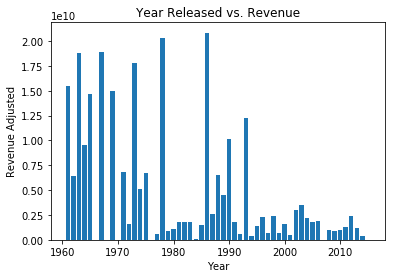

In [77]:
import matplotlib.pyplot as plt
arr = df['release_year'].unique()
plt.bar(arr, year_revenue)
plt.title('Year Released vs. Revenue')
plt.ylabel('Revenue Adjusted')
plt.xlabel('Year');


In [81]:
df['release_year'].describe()

count    1287.000000
mean     2007.017094
std         8.060503
min      1961.000000
25%      2005.000000
50%      2009.000000
75%      2011.000000
max      2015.000000
Name: release_year, dtype: float64

### Research Question 2: Did movies with higher vote count received a better rating?

In [26]:
#Slice DataFrame to get 2 columns 'vote_count' and 'vote_average'
df_vote = df.loc[:, 'vote_count' : 'vote_average']
#To compare results only entries are considered with more than 2000 votes
df_vote_2000 = df_vote[df_vote['vote_count'] > 2000]

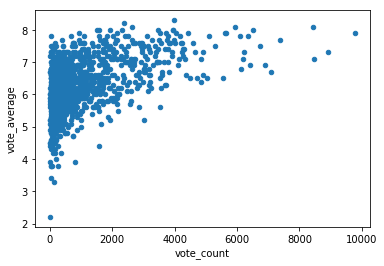

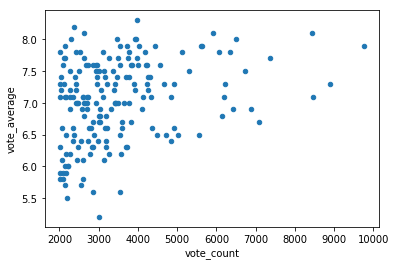

In [27]:
df_vote.plot(x='vote_count', y='vote_average', kind='scatter');
df_vote_2000.plot(x='vote_count', y='vote_average', kind='scatter');

In [28]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.000000,0.464812
vote_average,0.464812,1.000000


In [29]:
df_vote_2000.corr()

,vote_count,vote_average
vote_count,1.000000,0.305343
vote_average,0.305343,1.000000


### Research Question 3: What is the relationship between the vote avg and runtime?

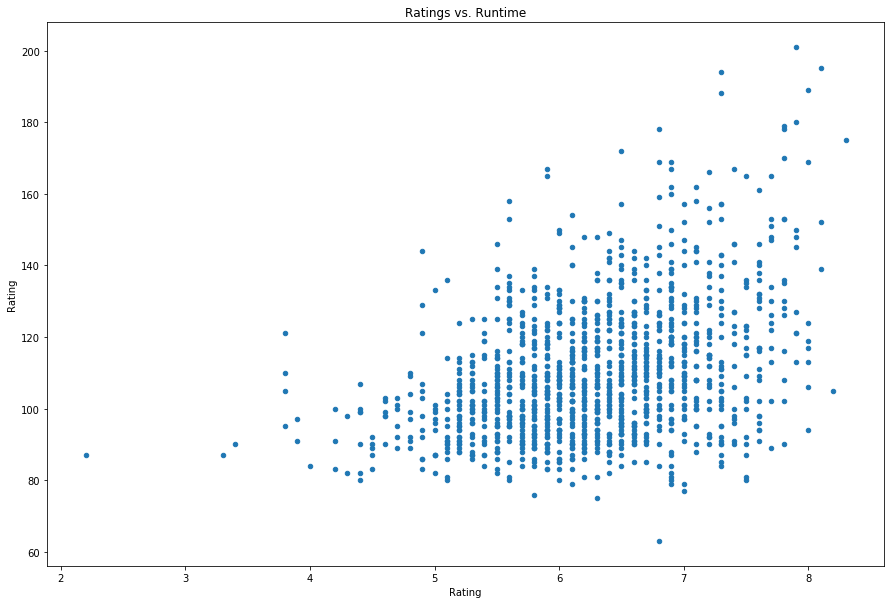

In [59]:
df.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10))
plt.title('Ratings vs. Runtime')
plt.xlabel('Rating')
plt.ylabel('Rating');

### Research Question 4: How did the amount of produced films changed over time?

In [51]:
df_genres = df.loc['genres_1': 'genres_5' ]

df_genres_dates = df['release_year']

years = df['release_year'].unique()
amount_of_movies = [] 
for year in years:
    d = df_genres_dates[df['release_year'] == year] 
    e = len(d.index) 
    amount_of_movies.append((year, e)) 

df_amount_of_movies = pd.DataFrame(amount_of_movies, columns=['release_year', 'amount_of_mvies']).sort_values('release_year').reset_index().drop(['index'], axis=1)

,release_year,amount_of_mvies
0,1961,1
1,1962,1
2,1963,1
3,1964,2
4,1965,1
5,1967,1
6,1969,1
7,1971,4
8,1972,1
9,1973,2


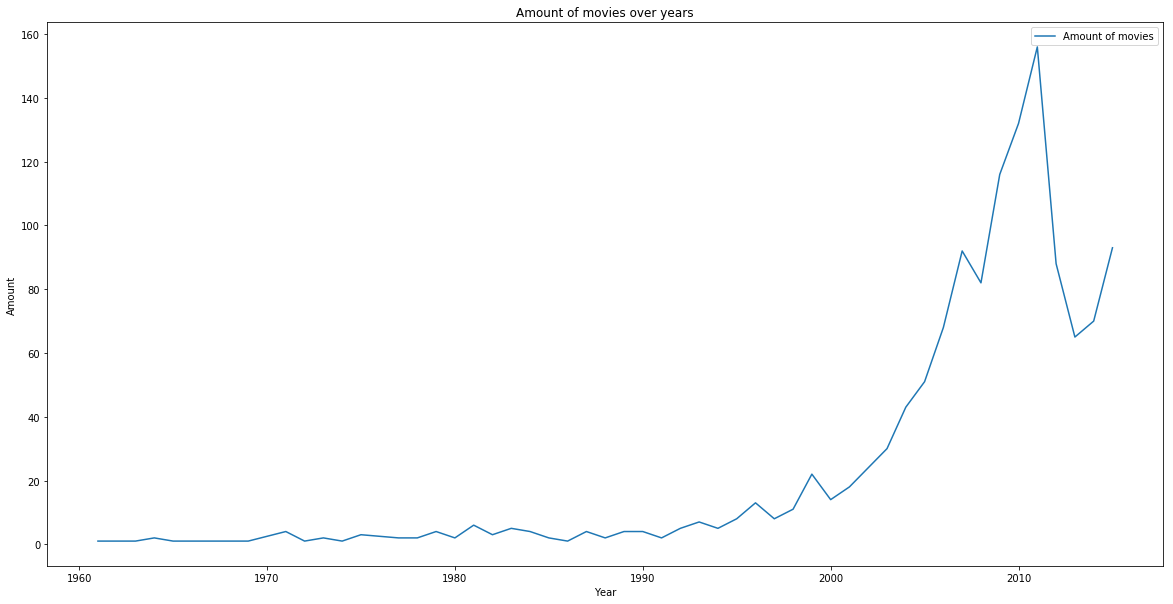

In [52]:
df_amount_of_movies.plot(x='release_year', y='amount_of_mvies', kind='line', figsize=(20,10), title="Amount of movies over years", label="Amount of movies", )
plt.xlabel('Year')
plt.ylabel('Amount');
df_amount_of_movies

<a id='conclusions'></a>
## Conclusions

> 
>There are plenty of conclusions that we deduced throughout this data analysis and from our questions

>First of all we deduced that the best movies and TV shows were released before the 2000s because I can conclusively
say that those movies tend to bring in the most revenue.On the other hand, in the last 20 years movies bring less revenue because it is less creative and has repeated ideas while old movies has different ideas and more exciting to people.

>We also deduced that it does not indicate that movies with a higher votecount receive a higher vote average. Also by considering columns with more than 2000 vote_count does not change the impression. Furthermore, the corralation does not indicate that higher vote counts result in higher vote averages.

>The conclusions I've come to in analyzing the relationship between ratings and runtime are that short films (less than 10 minutes) are likely to have a mid-to-high rating, and TV series (greater than 300 minutes) consistently get higher-thanaverage ratings. The ratings of films/shows with a runtime of around 100 minutes are unpredictable, as they can run from low to high, and films with a runtime above or below 100 minues tend to have mid-to-high ratings. Just at first glance of the scatterplot, users are more friendly - as in they tend to give mostly mid-to-high ratings overall - so production companies will want to make sure their film/show is reviewed on TMDB.

>The last question reveals that the amount of produced films significantly increased from 1960 to 2015. Up to 1983 not more than 100 movies were prodcued per year, while in 2014 700 movies were produced. A strong increase in movie production can be obsorved between 1997-2009. One has to consider that the line chart does not show accurate results, as many rows from the original dataset were dropped.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!